In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('df_comp.csv') # ajouter le chemin d'accés nécessaire

In [3]:
df

,Unnamed: 0,Date,Pm10,Pm25,Copernicus_pm10,Copernicus_pm2p5
0,0,2020-01-09 00:00:00,16.0,5.8,13.762664,4.375093
1,1,2020-01-09 01:00:00,18.3,6.5,12.701500,4.096881
2,2,2020-01-09 02:00:00,16.8,5.4,12.568245,4.443961
3,3,2020-01-09 03:00:00,14.6,5.1,12.893181,4.391348
4,4,2020-01-09 04:00:00,14.2,4.3,13.524376,4.169511
...,...,...,...,...,...,...
17035,21057,2022-12-31 19:00:00,20.5,11.1,16.580000,7.340000
17036,21058,2022-12-31 20:00:00,22.3,13.0,16.810000,7.300000
17037,21059,2022-12-31 21:00:00,19.1,11.1,16.290000,7.010000
17038,21060,2022-12-31 22:00:00,20.5,13.0,15.210000,7.390000


#Ajout des différence absolue et en pourcentage

In [4]:
# différence absolue et en pourcentage
df['diff_pm10'] = df['Pm10'] - df['Copernicus_pm10']
df['diff_pct_pm10'] = ((df['Pm10'] - df['Copernicus_pm10']) / df['Copernicus_pm10']) * 100

df['diff_pm25'] = df['Pm25'] - df['Copernicus_pm2p5']
df['diff_pct_pm25'] = ((df['Pm25'] - df['Copernicus_pm2p5']) / df['Copernicus_pm2p5']) * 100


#Différence moyenne du pm10 par tranches horaires et par saisons

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

# extraire la saison et l'heure en tranches de 4 heures
df['saison'] = df['Date'].dt.month.apply(lambda x: 'hiver' if x in [12, 1, 2] else 'printemps' if x in [3, 4, 5] else 'été' if x in [6, 7, 8] else 'automne')
df['tranche_horaire'] = pd.cut(df['Date'].dt.hour, bins=range(0, 25, 4), labels=['00-04', '04-08', '08-12', '12-16', '16-20', '20-00'])

# Calculer la différence moyenne par saison et par tranche horaire
result = df.groupby(['saison', 'tranche_horaire']).apply(lambda x: (x['Pm10'] - x['Copernicus_pm10']).mean()).reset_index(name='diff_moyenne')


In [6]:
result

,saison,tranche_horaire,diff_moyenne
0,automne,00-04,0.006158
1,automne,04-08,-0.176101
2,automne,08-12,4.366853
3,automne,12-16,4.619879
4,automne,16-20,1.068767
5,automne,20-00,0.083190
6,hiver,00-04,-2.188337
7,hiver,04-08,-2.864586
8,hiver,08-12,1.556999
9,hiver,12-16,2.888399


In [7]:
nombre_valeurs_negatives = (df['diff_pm10'] < 0).sum()
nombre_valeurs_positives = (df['diff_pm10'] > 0).sum()
nombre_valeurs_egales = (df['diff_pm10'] == 0).sum()
nombre_valeurs_nulle = (df['diff_pm10'].isna()).sum()

#Analyse de 2021


In [8]:
# Convertir la colonne 'Date' en datetime si ce n'est pas déjà le cas
df['Date'] = pd.to_datetime(df['Date'])

# extraction de l'année, le mois, le jour et l'heure de chaque date et créer quatre nouvelles colonnes
df['Année'] = df['Date'].dt.year
df['Mois'] = df['Date'].dt.month
df['Jour'] = df['Date'].dt.day
df['Heure'] = df['Date'].dt.hour

#filtre sur les lignes pour ne prendre que celles de l'année 2021
df_2021 = df[df['Année'] == 2021]
df_2021 = df_2021[df_2021['Mois'] == 1]
# création des plages de 4 heures dans une journée
df_2021['Plage_4_Heures'] = df_2021['Heure'] // 4

# Calculer le nombre de valeurs négatives
nombre_valeurs_negatives_par_plage = df_2021.groupby(['Année', 'Mois', 'Jour', 'Plage_4_Heures'])['diff_pm10'].apply(lambda x: (x < 0).sum())
nombre_valeurs_pos_par_plage = df_2021.groupby(['Année', 'Mois', 'Jour', 'Plage_4_Heures'])['diff_pm10'].apply(lambda x: (x > 0).sum())

nombre_valeurs_negatives_par_plage


Année  Mois  Jour  Plage_4_Heures
2021   1     1     0                 4
                   1                 4
                   2                 4
                   3                 2
                   4                 4
                                    ..
             31    1                 4
                   2                 4
                   3                 3
                   4                 2
                   5                 1
Name: diff_pm10, Length: 180, dtype: int64

#Nombre de valeurs négatives par tranche horaires

In [9]:
# Convertir la colonne 'Date' en datetime si ce n'est pas déjà le cas
df['Date'] = pd.to_datetime(df['Date'])

# Extraire l'heure de chaque date et créer une nouvelle colonne 'Heure'
df['Heure'] = df['Date'].dt.hour

# Créer une colonne pour représenter les plages de 4 heures dans une journée
df['Plage_4_Heures'] = df['Heure'] // 4

# Calculer le nombre de valeurs négatives dans la colonne 'MaColonne' pour chaque plage de 4 heures
nombre_valeurs_negatives_par_plage = df.groupby('Plage_4_Heures')['diff_pm10'].apply(lambda x: (x < 0).sum())
nombre_valeurs_pos_par_plage = df.groupby('Plage_4_Heures')['diff_pm10'].apply(lambda x: (x > 0).sum())

# Afficher le résultat
print(nombre_valeurs_negatives_par_plage)


Plage_4_Heures
0    1817
1    2007
2     919
3     560
4     912
5    1264
Name: diff_pm10, dtype: int64


In [10]:
df['Date'] = pd.to_datetime(df['Date'])

df['Mois'] = df['Date'].dt.month

#création d'une colonne pour représenter les saisons
df['Saison'] = df['Mois'].apply(lambda x: (x % 12 + 3) // 3)
saison_labels = {1: 'Hiver', 2: 'Printemps', 3: 'Été', 4: 'Automne'}

df['Heure'] = df['Date'].dt.hour
df['Plage_4_Heures'] = df['Heure'] // 4

#calcule du nombre de valeurs négatives dans la colonne 'diff_pm10' pour chaque saison et plage de 4 heures
nombre_valeurs_negatives_par_saison_et_plage = df.groupby(['Saison', 'Plage_4_Heures'])['diff_pm10'].apply(lambda x: (x < 0).sum())
nombre_valeurs_pos_par_saison_et_plage = df.groupby(['Saison', 'Plage_4_Heures'])['diff_pm10'].apply(lambda x: (x > 0).sum())

#renommage les index avec les noms des saisons
nombre_valeurs_negatives_par_saison_et_plage.index = nombre_valeurs_negatives_par_saison_et_plage.index.set_levels(nombre_valeurs_negatives_par_saison_et_plage.index.levels[0].map(saison_labels), level=0)
nombre_valeurs_pos_par_saison_et_plage.index = nombre_valeurs_pos_par_saison_et_plage.index.set_levels(nombre_valeurs_pos_par_saison_et_plage.index.levels[0].map(saison_labels), level=0)

print(nombre_valeurs_negatives_par_saison_et_plage)


Saison     Plage_4_Heures
Hiver      0                 544
           1                 607
           2                 365
           3                 221
           4                 336
           5                 398
Printemps  0                 428
           1                 445
           2                 164
           3                 104
           4                 191
           5                 292
Été        0                 310
           1                 372
           2                 103
           3                  57
           4                  85
           5                 165
Automne    0                 535
           1                 583
           2                 287
           3                 178
           4                 300
           5                 409
Name: diff_pm10, dtype: int64


In [11]:
print(nombre_valeurs_pos_par_saison_et_plage)

Saison     Plage_4_Heures
Hiver      0                 266
           1                 206
           2                 404
           3                 508
           4                 393
           5                 378
Printemps  0                 320
           1                 280
           2                 460
           3                 467
           4                 390
           5                 383
Été        0                 366
           1                 302
           2                 395
           3                 372
           4                 336
           5                 408
Automne    0                 411
           1                 367
           2                 587
           3                 627
           4                 470
           5                 462
Name: diff_pm10, dtype: int64


In [12]:
df['Date'] = pd.to_datetime(df['Date'])

df['Mois'] = df['Date'].dt.month
df['Saison'] = df['Mois'].apply(lambda x: (x % 12 + 3) // 3)
df['Heure'] = df['Date'].dt.hour
df['Plage_4_Heures'] = df['Heure'] // 4

nombre_valeurs_pos_par_saison_et_plage = df.groupby(['Saison', 'Plage_4_Heures'])['diff_pm10'].apply(lambda x: (x > 0).sum())
nombre_valeurs_pos_par_saison_et_plage.index = nombre_valeurs_pos_par_saison_et_plage.index.set_levels(nombre_valeurs_pos_par_saison_et_plage.index.levels[0].map(saison_labels), level=0)

resultats_df_pos = pd.DataFrame(nombre_valeurs_pos_par_saison_et_plage)

resultats_df_pos = resultats_df_pos.rename(columns={'diff_pm10': 'Nombre_Valeurs_Pos'})

resultats_df_pos['Pourcentage_Valeurs_Pos'] = (resultats_df_pos['Nombre_Valeurs_Pos'] / resultats_df_pos.groupby('Plage_4_Heures')['Nombre_Valeurs_Pos'].transform('sum')) * 100

resultats_df_pos


Nombre_Valeurs_Pos  Pourcentage_Valeurs_Pos
Saison    Plage_4_Heures                                             
Hiver     0                              266                19.515774
          1                              206                17.835498
          2                              404                21.885157
          3                              508                25.734549
          4                              393                24.732536
          5                              378                23.175966
Printemps 0                              320                23.477623
          1                              280                24.242424
          2                              460                24.918743
          3                              467                23.657548
          4                              390                24.543738
          5                              383                23.482526
Été       0                              366                26.852531
          1                              302                26.147186
          2                              395                21.397616
          3                              372                18.844985
          4                              336                21.145374
          5                              408                25.015328
Automne   0                              411                30.154072
          1                              367                31.774892
          2                              587                31.798483
          3                              627                31.762918
          4                              470                29.578351
          5                              462                28.326180

In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df['Mois'] = df['Date'].dt.month
df['Saison'] = df['Mois'].apply(lambda x: (x % 12 + 3) // 3)
df['Heure'] = df['Date'].dt.hour

# colonne pour représenter si la valeur est négative
df['Valeur_Negative'] = df['diff_pm10'] < 0

df['Plage_4_Heures'] = (df['Heure'] // 4) * 4

nombre_valeurs_negatives_par_saison_et_plage = df.groupby(['Saison', 'Plage_4_Heures', 'Valeur_Negative']).size().unstack(fill_value=0)

#renommage des colonnes
nombre_valeurs_negatives_par_saison_et_plage.columns = ['Nombre_Valeurs_Positives', 'Nombre_Valeurs_Negatives']

# Ajouter le label des saisons
nombre_valeurs_negatives_par_saison_et_plage['Saison_Label'] = nombre_valeurs_negatives_par_saison_et_plage.index.get_level_values('Saison').map(saison_labels)

#calcul du pourcentage de valeurs négatives par rapport au total des valeurs (positives et négatives)
nombre_valeurs_negatives_par_saison_et_plage['Pourcentage_Valeurs_Negatives'] = (nombre_valeurs_negatives_par_saison_et_plage['Nombre_Valeurs_Negatives'] / (nombre_valeurs_negatives_par_saison_et_plage['Nombre_Valeurs_Positives'] + nombre_valeurs_negatives_par_saison_et_plage['Nombre_Valeurs_Negatives'])) * 100
nombre_valeurs_negatives_par_saison_et_plage['Pourcentage_Valeurs_Positives'] = (nombre_valeurs_negatives_par_saison_et_plage['Nombre_Valeurs_Positives'] / (nombre_valeurs_negatives_par_saison_et_plage['Nombre_Valeurs_Negatives'] + nombre_valeurs_negatives_par_saison_et_plage['Nombre_Valeurs_Positives'])) * 100

nombre_valeurs_negatives_par_saison_et_plage


Nombre_Valeurs_Positives  Nombre_Valeurs_Negatives  \
Saison Plage_4_Heures                                                       
1      0                                    266                       544   
       4                                    206                       607   
       8                                    405                       365   
       12                                   508                       221   
       16                                   393                       336   
       20                                   378                       398   
2      0                                    320                       428   
       4                                    280                       445   
       8                                    460                       164   
       12                                   467                       104   
       16                                   390                       191   
       20                                   384                       292   
3      0                                    366                       310   
       4                                    302                       372   
       8                                    396                       103   
       12                                   372                        57   
       16                                   336                        85   
       20                                   408                       165   
4      0                                    411                       535   
       4                                    367                       583   
       8                                    587                       287   
       12                                   627                       178   
       16                                   470                       300   
       20                                   462                       409   

                      Saison_Label  Pourcentage_Valeurs_Negatives  \
Saison Plage_4_Heures                                               
1      0                     Hiver                      67.160494   
       4                     Hiver                      74.661747   
       8                     Hiver                      47.402597   
       12                    Hiver                      30.315501   
       16                    Hiver                      46.090535   
       20                    Hiver                      51.288660   
2      0                 Printemps                      57.219251   
       4                 Printemps                      61.379310   
       8                 Printemps                      26.282051   
       12                Printemps                      18.213660   
       16                Printemps                      32.874355   
       20                Printemps                      43.195266   
3      0                       Été                      45.857988   
       4                       Été                      55.192878   
       8                       Été                      20.641283   
       12                      Été                      13.286713   
       16                      Été                      20.190024   
       20                      Été                      28.795812   
4      0                   Automne                      56.553911   
       4                   Automne                      61.368421   
       8                   Automne                      32.837529   
       12                  Automne                      22.111801   
       16                  Automne                      38.961039   
       20                  Automne                      46.957520   

                       Pourcentage_Valeurs_Positives  
Saison Plage_4_Heures                                 
1      0                                   32.839506  
       4                                   25.338253  
     

In [14]:
# Enregistrer le DataFrame dans un fichier CSV
nombre_valeurs_negatives_par_saison_et_plage.to_csv('resultats_valeurs_negatives_par_saison_et_plage.csv', index=True)

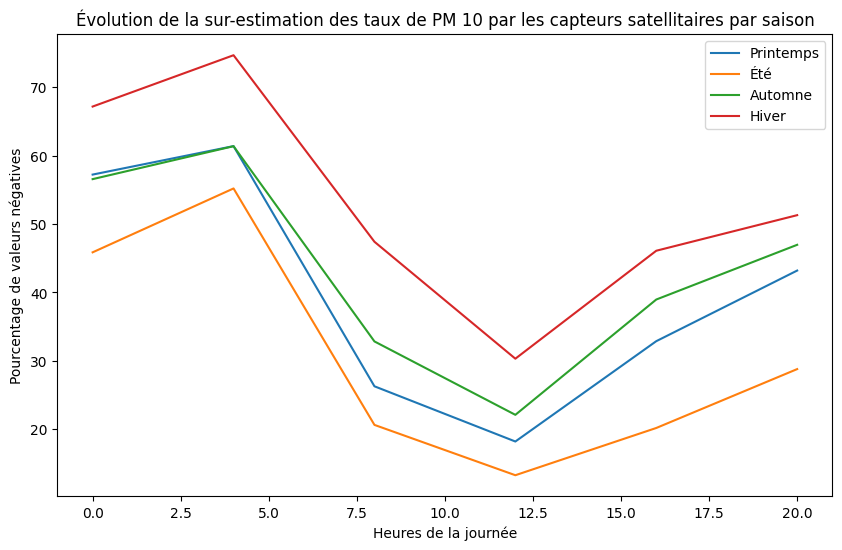

In [15]:
import matplotlib.pyplot as plt

df = pd.read_csv('resultats_valeurs_negatives_par_saison_et_plage.csv')

df = df.sort_values(['Saison', 'Plage_4_Heures'])

# division du DataFrame en quatre DataFrames, un pour chaque saison
df_printemps = df[df['Saison_Label'] == 'Printemps']
df_ete = df[df['Saison_Label'] == 'Été']
df_automne = df[df['Saison_Label'] == 'Automne']
df_hiver = df[df['Saison_Label'] == 'Hiver']

plt.figure(figsize=(10, 6))

# Tracer les courbes pour chaque saison
plt.plot(df_printemps['Plage_4_Heures'], df_printemps['Pourcentage_Valeurs_Negatives'], label='Printemps')
plt.plot(df_ete['Plage_4_Heures'], df_ete['Pourcentage_Valeurs_Negatives'], label='Été')
plt.plot(df_automne['Plage_4_Heures'], df_automne['Pourcentage_Valeurs_Negatives'], label='Automne')
plt.plot(df_hiver['Plage_4_Heures'], df_hiver['Pourcentage_Valeurs_Negatives'], label='Hiver')

# étiquettes et titre
plt.xlabel('Heures de la journée')
plt.ylabel('Pourcentage de valeurs négatives')
plt.title('Évolution de la sur-estimation des taux de PM 10 par les capteurs satellitaires par saison')

plt.legend()

plt.show()


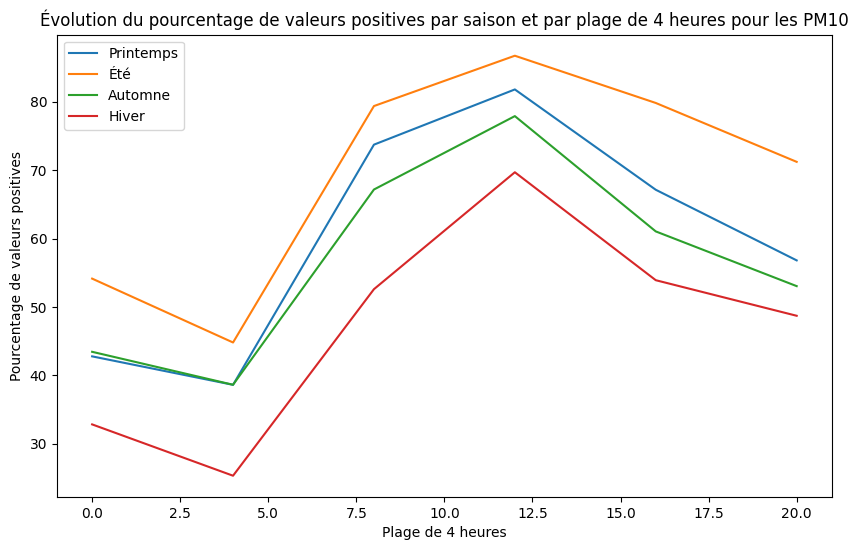

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('resultats_valeurs_negatives_par_saison_et_plage.csv')
df = df.sort_values(['Saison', 'Plage_4_Heures'])

df_printemps = df[df['Saison_Label'] == 'Printemps']
df_ete = df[df['Saison_Label'] == 'Été']
df_automne = df[df['Saison_Label'] == 'Automne']
df_hiver = df[df['Saison_Label'] == 'Hiver']

# Créer un graphique à lignes multiples
plt.figure(figsize=(10, 6))

plt.plot(df_printemps['Plage_4_Heures'], df_printemps['Pourcentage_Valeurs_Positives'], label='Printemps')
plt.plot(df_ete['Plage_4_Heures'], df_ete['Pourcentage_Valeurs_Positives'], label='Été')
plt.plot(df_automne['Plage_4_Heures'], df_automne['Pourcentage_Valeurs_Positives'], label='Automne')
plt.plot(df_hiver['Plage_4_Heures'], df_hiver['Pourcentage_Valeurs_Positives'], label='Hiver')

plt.xlabel('Plage de 4 heures')
plt.ylabel('Pourcentage de valeurs positives')
plt.title('Évolution du pourcentage de valeurs positives par saison et par plage de 4 heures pour les PM10')

plt.legend()

plt.show()
